In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
ess = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
ess['year'].unique()

array([6, 7])

In [5]:
ess['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

## 1. Did people become less trusting from 2012 to 2014? Compute the results for each country in the sample.

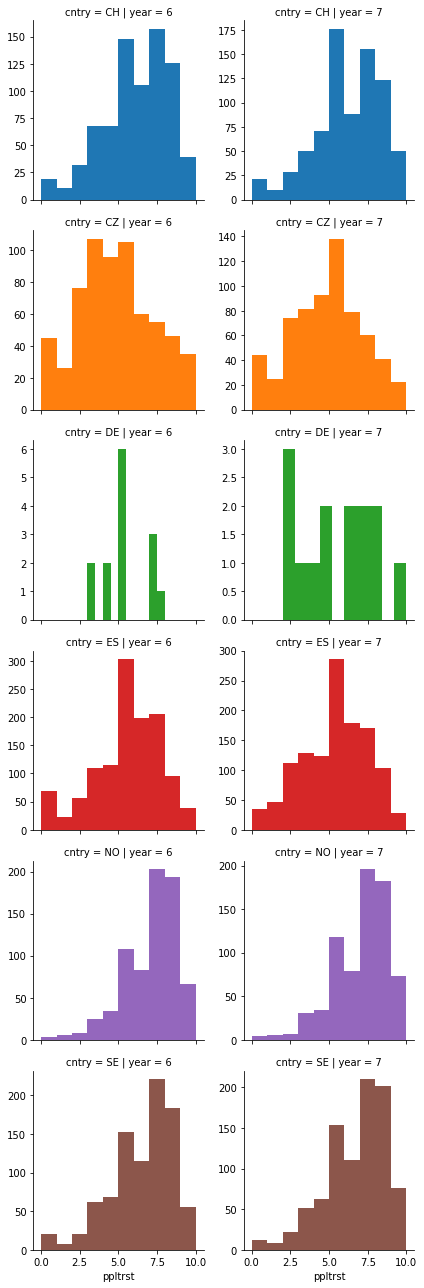

In [8]:
## Check for normality

g = sns.FacetGrid(ess, row='cntry', col='year', hue='cntry', sharey=False)
g = g.map(plt.hist, 'ppltrst')
plt.show()

In [9]:
## Close to normal so can use parametric tests

In [33]:
## Use a paired t-test for each country

for country in ess['cntry'].unique():
    print('Country:', country)
    year1 = ess.loc[(ess['cntry'] == country) & (ess['year'] == 6), ['idno', 'ppltrst']]
    year2 = ess.loc[(ess['cntry'] == country) & (ess['year'] == 7), ['idno', 'ppltrst']]
    country_df = pd.merge(year1, year2, on=['idno'])
    country_df.dropna(inplace=True)
    print('Change in trust level:', (country_df['ppltrst_y'].mean() - country_df['ppltrst_x'].mean()))
    print(ttest_rel(country_df['ppltrst_x'], country_df['ppltrst_y']))
    print('\n')

Country: CH
Change in trust level: 0.07373868046571808
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)


Country: CZ
Change in trust level: 0.06769230769230816
Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.6171292682404208)


Country: DE
Change in trust level: 0.14285714285714235
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)


Country: ES
Change in trust level: -0.2171758876961185
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725321856)


Country: NO
Change in trust level: -0.04801097393689968
Ttest_relResult(statistic=0.5073077081124404, pvalue=0.6120925701518767)


Country: SE
Change in trust level: 0.1986754966887414
Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.0390078167095776)




In [29]:
## Spain might be significant but check with multiple test correction
## Don't want to compare all possible pairs though so does Tukey work?
## Bonferroni?

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

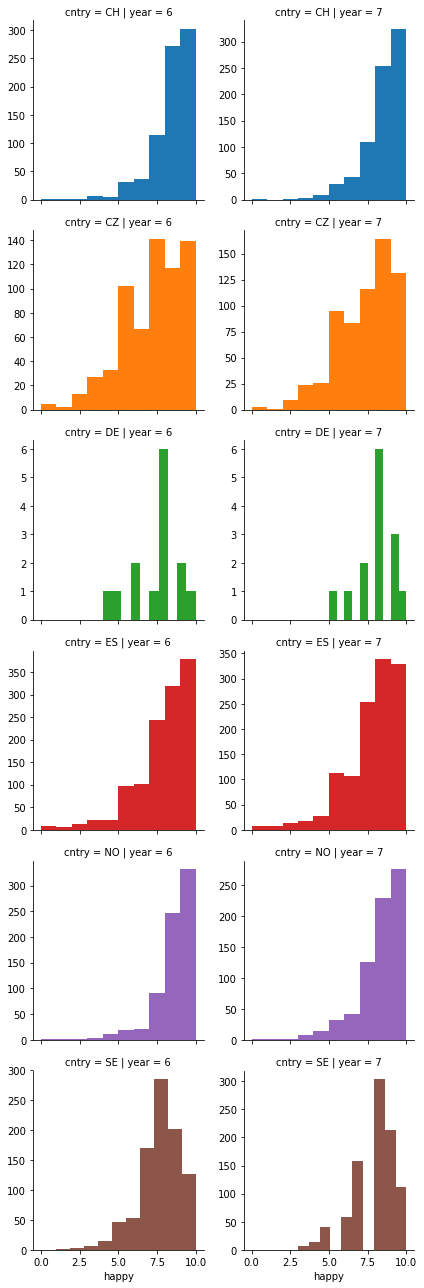

In [35]:
## Check for normality

g = sns.FacetGrid(ess, row='cntry', col='year', hue='cntry', sharey=False)
g = g.map(plt.hist, 'happy', bins=10)
plt.show()

In [36]:
## Some look a bit normal but others really not. Let's try non-parametric

In [43]:
for country in ess['cntry'].unique():
    country_df = ess.loc[ess['cntry'] == country, ['year', 'happy']]
    country_df.dropna(inplace=True)
    happy = country_df['happy']
    year1_num = len(country_df.loc[country_df['year'] == 6,])
    happy1 = happy[: year1_num]
    happy2 = happy[year1_num: ]
    print('Country:', country)
    print('Change in means:', (happy2.mean() - happy1.mean()))
    print(stats.kruskal(happy1, happy2))
    print("\n")

Country: CH
Change in means: 0.028117807160498387
KruskalResult(statistic=0.22331955287588717, pvalue=0.6365221432042547)


Country: CZ
Change in means: 0.1432125966305149
KruskalResult(statistic=1.4258218687180508, pvalue=0.23244752383800354)


Country: DE
Change in means: 0.42857142857142794
KruskalResult(statistic=0.39056749122656015, pvalue=0.532001255058662)


Country: ES
Change in means: -0.12871287128712883
KruskalResult(statistic=4.089203641177268, pvalue=0.04315797189625085)


Country: NO
Change in means: -0.33653471625046905
KruskalResult(statistic=19.139561932891844, pvalue=1.215001301639077e-05)


Country: SE
Change in means: 0.03957433588967341
KruskalResult(statistic=0.05045734520052835, pvalue=0.8222693615371405)




In [44]:
## No significant change except Norway which became unhappier.
## May need multiple test correction

## 3. Who reported watching more TV in 2012, men or women?

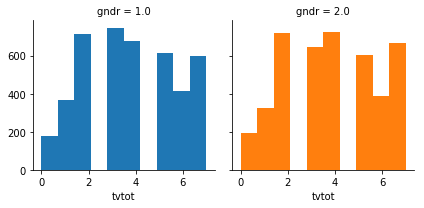

In [46]:
## Check for normality

g = sns.FacetGrid(ess, col='gndr', hue='gndr')
g = g.map(plt.hist, 'tvtot')
plt.show()

In [61]:
ess_2012 = ess.loc[ess['year'] == 6, ]

mean_m = ess_2012.loc[ess_2012['gndr'] == 1, 'tvtot'].mean()
sd_m = ess_2012.loc[ess_2012['gndr'] == 1, 'tvtot'].std()
mean_f = ess_2012.loc[ess_2012['gndr'] == 2, 'tvtot'].mean()
sd_f = ess_2012.loc[ess_2012['gndr'] == 2, 'tvtot'].std()

In [62]:
norm_m = np.random.normal(mean_m, sd_m, size=len(ess_2012.loc[ess_2012['gndr'] == 1, 'tvtot']))

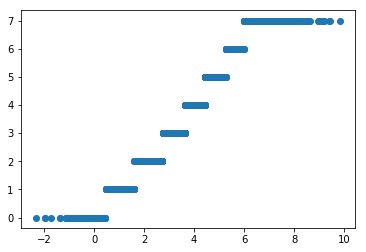

In [63]:
plt.scatter(np.sort(norm_m), np.sort(ess_2012.loc[ess_2012['gndr'] == 1, 'tvtot']))
plt.show()

In [57]:
## Approximately normal?

In [65]:
men = ess_2012.loc[ess_2012['gndr'] == 1, 'tvtot']
men.dropna(inplace=True)
women = ess_2012.loc[ess_2012['gndr'] == 2, 'tvtot']
women.dropna(inplace=True)

print('Mean male:', mean_m)
print('Mean female:', mean_f)
print(ttest_ind(men, women))

Mean male: 3.901906090190609
Mean female: 3.944392523364486
Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.4902360402696986)


In [66]:
## No significant difference

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

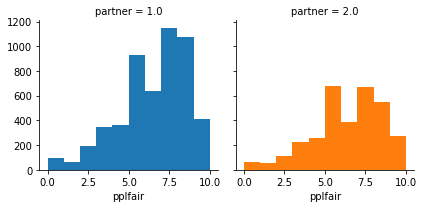

In [67]:
## Check for normality

g = sns.FacetGrid(ess, col='partner', hue='partner')
g = g.map(plt.hist, 'pplfair')
plt.show()

In [68]:
## Approximately normal

In [70]:
partner = ess.loc[(ess['year'] == 6) & (ess['partner'] == 1), 'pplfair']
partner.dropna(inplace=True)
no_partner = ess.loc[(ess['year'] == 6) & (ess['partner'] == 2), 'pplfair']
no_partner.dropna(inplace=True)

In [71]:
print('Mean with partner:', ess.loc[(ess['year'] == 6) & (ess['partner'] == 1), 'pplfair'].mean())
print('Mean without partner:', ess.loc[(ess['year'] == 6) & (ess['partner'] == 2), 'pplfair'].mean())
print(ttest_ind(partner, no_partner))

Mean with partner: 6.080736012016523
Mean without partner: 5.856965174129353
Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609883756)


In [72]:
## Significantly more likely to think fair if have partner

## 5. Pick three or four countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [104]:
ess_scl = ess.loc[ess['year'] == 7, ['cntry', 'sclmeet']]
ess_scl.dropna(inplace=True)
ess_scl.groupby('cntry')['sclmeet'].mean()

cntry
CH    5.160622
CZ    4.445802
DE    4.428571
ES    5.260116
NO    5.302326
SE    5.426211
Name: sclmeet, dtype: float64

In [75]:
sclmeet = ess_scl['sclmeet']
country = ess_scl['cntry']

tukey = pairwise_tukeyhsd(endog=sclmeet,
                         groups=country,
                         alpha=0.05)
tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH,CZ,-0.7148,-0.927,-0.5027,True
CH,DE,-0.7321,-1.8089,0.3448,False
CH,ES,0.0995,-0.0844,0.2834,False
CH,NO,0.1417,-0.0644,0.3478,False
CH,SE,0.2656,0.0701,0.4611,True
CZ,DE,-0.0172,-1.0958,1.0614,False
CZ,ES,0.8143,0.6206,1.008,True
CZ,NO,0.8565,0.6417,1.0714,True
CZ,SE,0.9804,0.7757,1.1851,True
DE,ES,0.8315,-0.2419,1.9049,False


In [78]:
## CZ (Czech Republic) looks significantly different from the others

## 6. Pick three or four countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences and if so, which countries stand out?

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


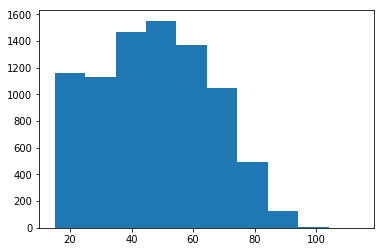

In [79]:
plt.hist(ess['agea'])
plt.show()

In [98]:
ess_2014 = ess.loc[ess['year'] == 7, ]
ess_2014.dropna(subset=['agea'], inplace=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [99]:
ess_2014['age_group'] = np.nan

for row in ess_2014.index:
    print(row)
    if ess_2014.loc[row, 'agea'] < 35:
        ess_2014.loc[row, 'age_group'] = 'under35'
    elif ess_2014.loc[row, 'agea'] < 50:
        ess_2014.loc[row, 'age_group'] = '35to50'
    elif ess_2014.loc[row, 'agea'] < 65:
        ess_2014.loc[row, 'age_group'] = '50to65'
    else:
        ess_2014.loc[row, 'age_group'] = 'over65'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
952
953
954
955
956
957
958
959
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
10

4387
4388
4389
4390
4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4414
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4437
4438
4439
4440
4441
4442
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515
4516
4517
4518
4519
4521
4522
4523
4524
4525
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593


7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7937
7938


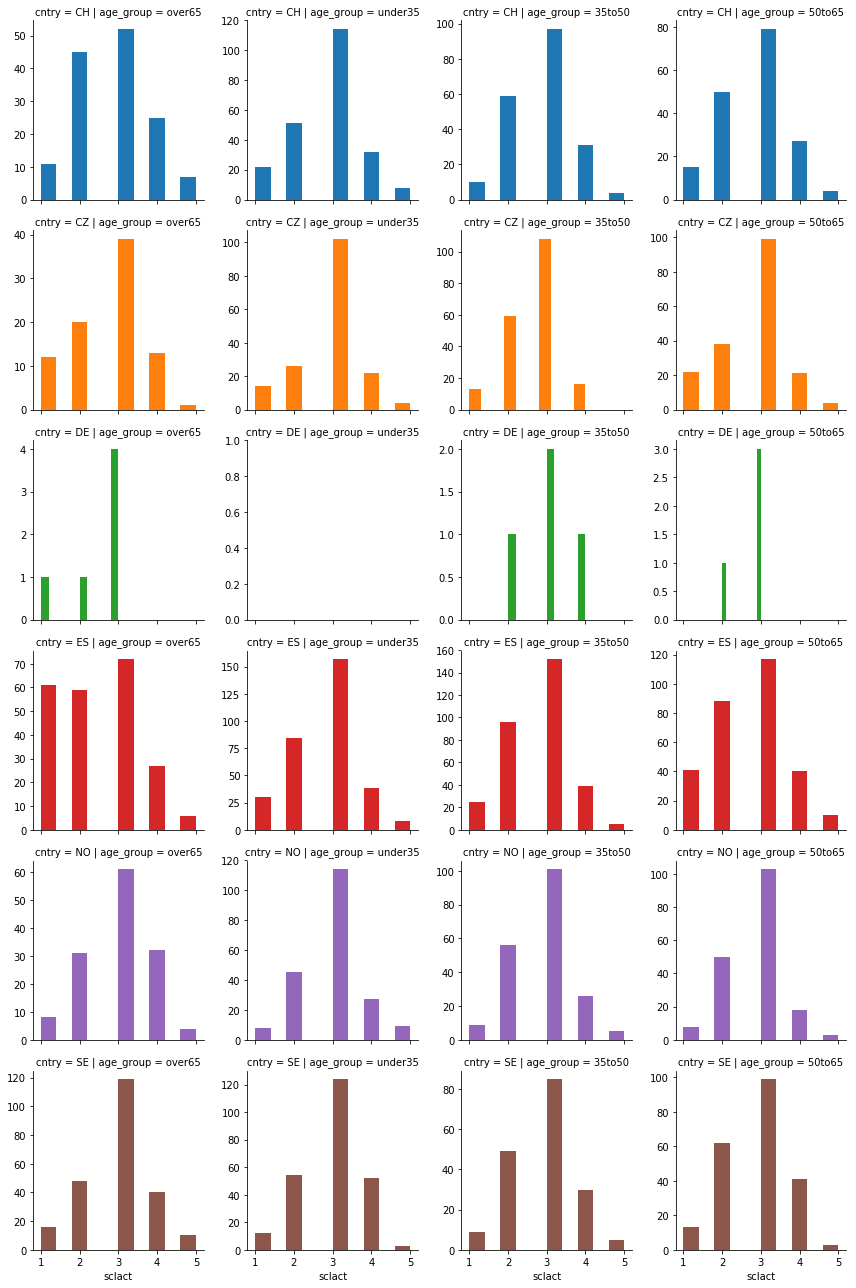

In [100]:
g = sns.FacetGrid(ess_2014, row='cntry', col='age_group', hue='cntry', sharey=False)
g = g.map(plt.hist, 'sclact')
plt.show()

In [101]:
## Normal looking

In [105]:
ess_2014.groupby(['age_group', 'cntry'])['sclact'].mean()

age_group  cntry
35to50     CH       2.800995
           CZ       2.647959
           DE       3.000000
           ES       2.694006
           NO       2.807107
           SE       2.848315
50to65     CH       2.742857
           CZ       2.711957
           DE       2.750000
           ES       2.628378
           NO       2.769231
           SE       2.811927
over65     CH       2.800000
           CZ       2.658824
           DE       2.500000
           ES       2.368889
           NO       2.948529
           SE       2.914163
under35    CH       2.792952
           CZ       2.857143
           ES       2.716088
           NO       2.921182
           SE       2.918367
Name: sclact, dtype: float64

In [103]:
for group in ess_2014['age_group'].unique():
    group_df = ess_2014.loc[ess_2014['age_group'] == group, ['sclact', 'cntry']]
    group_df.dropna(inplace=True)
    sclact = group_df['sclact']
    country = group_df['cntry']
    tukey = pairwise_tukeyhsd(endog=sclact,
                             groups = country,
                             alpha=0.05)
    print('Age group: ', group)
    print(tukey.summary())
        

Age group:  over65
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  CH     CZ   -0.1412  -0.5246 0.2422 False 
  CH     DE     -0.3   -1.4624 0.8624 False 
  CH     ES   -0.4311  -0.7312 -0.131  True 
  CH     NO    0.1485  -0.1872 0.4842 False 
  CH     SE    0.1142   -0.184 0.4123 False 
  CZ     DE   -0.1588  -1.3366 1.0189 False 
  CZ     ES   -0.2899  -0.6449 0.065  False 
  CZ     NO    0.2897  -0.0958 0.6752 False 
  CZ     SE    0.2553   -0.098 0.6086 False 
  DE     ES   -0.1311  -1.2845 1.0222 False 
  DE     NO    0.4485  -0.7146 1.6116 False 
  DE     SE    0.4142  -0.7387 1.567  False 
  ES     NO    0.5796   0.2768 0.8825  True 
  ES     SE    0.5453   0.2847 0.8059  True 
  NO     SE   -0.0344  -0.3352 0.2665 False 
--------------------------------------------
Age group:  under35
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
----

In [106]:
## Only significant differences are over 65 from ES.